In [2]:
#Importing Various Python modules 

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import csv
from time import sleep
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error 
%matplotlib inline

In [3]:
#GoalKeepers

players_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dict_output1.csv',index_col='web_name', na_filter=False)

#Observing the Data for Exploration
players_df.head()
players_df.tail()
players_df.dtypes
players_df.iloc[0,:]


transfers_out                                                              161257
yellow_cards                                                                    1
code                                                                        59936
event_total                                                                     2
goals_conceded                                                                 13
photo                                                                   59936.jpg
red_cards                                                                       0
saves                                                                          26
ep_this                                                                         4
value_form                                                                    0.7
next_fixture                                                          Man Utd (H)
team_id                                                                         1
goals_scored    

In [16]:
#Filtering the data only for GoalKeepers
players_df[players_df.type_name=='Goalkeeper'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated_keep.csv')

GoalKeeper_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated_keep.csv',index_col='web_name', na_filter=False)


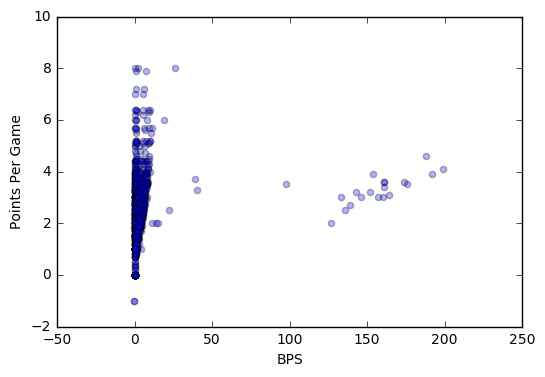

In [18]:
#Some random plotting to determine which attributes to use in the final model
plt.scatter(players_df.value_form, players_df.points_per_game, alpha=0.3)
plt.scatter(players_df.value_season, players_df.points_per_game, alpha=0.3) 
plt.scatter(GoalKeeper_df.bps, GoalKeeper_df.points_per_game, alpha=0.3) 
plt.xlabel("BPS")
plt.ylabel("Points Per Game")

In [19]:
#Exploring the data in the Midfielders data frame
GoalKeeper_df.describe()
GoalKeeper_df.head()
GoalKeeper_df.tail()
GoalKeeper_df.dtypes
GoalKeeper_df.points_per_game.describe()
GoalKeeper_df.points_per_game.value_counts()
GoalKeeper_df.isnull()

,transfers_out,yellow_cards,code,event_total,goals_conceded,photo,red_cards,saves,ep_this,value_form,...,minutes,transfers_in_event,selected_by,element_type,ep_next,team,chance_of_playing_this_round,event_points,second_name,cost_change_event
web_name,,,,,,,,,,,,,,,,,,,,,
Szczesny,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Given,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Guzan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Heaton,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gilks,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cech,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Courtois,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Speroni,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Hennessey,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#Creating  Initial Linear Model for GoalKeeper

goalkeepers_model = smf.ols(formula='event_total ~ selected_by + value_form + value_season + form + ea_index + bps', data=GoalKeeper_df).fit()
goalkeepers_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     15.34
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           2.17e-09
Time:                        19:48:05   Log-Likelihood:                -82.361
No. Observations:                  51   AIC:                             178.7
Df Residuals:                      44   BIC:                             192.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.1023      0.252     -0.407      0.686        -0.609     0.405
selected_by     -0.0012      0.052     -0.022      0.982        -0.105     0.103
value_form       3.0628      4.125      0.743      0.462        -5.250    11.375
value_season     1.2633      0.420      3.005      0.004         0.416     2.110
form            -0.2633      0.871     -0.302      0.764        -2.018     1.491
ea_index         0.0279      0.018      1.524      0.135        -0.009     0.065
bps             -0.0602      0.022     -2.760      0.008        -0.104    -0.016
==============================================================================
Omnibus:                        6.328   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                8.142
Skew:                           0.303   Prob(JB):                       0.0171
Kurtosis:                       4.861   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115508e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11df7ea58>]], dtype=object)

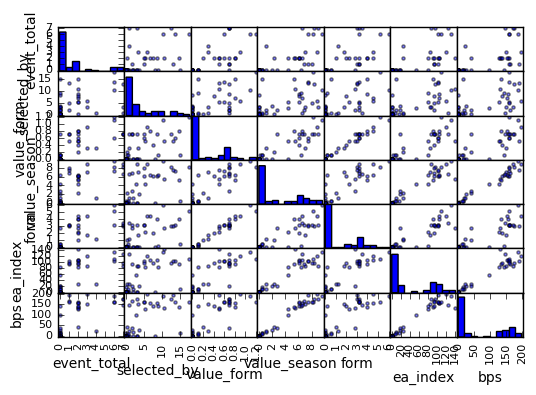

In [21]:
# Exploring Multi-collinearity between Variables
columns = ['event_total', 'selected_by', 'value_form', 'value_season', 'form','ea_index','bps']
pd.scatter_matrix(GoalKeeper_df[columns])

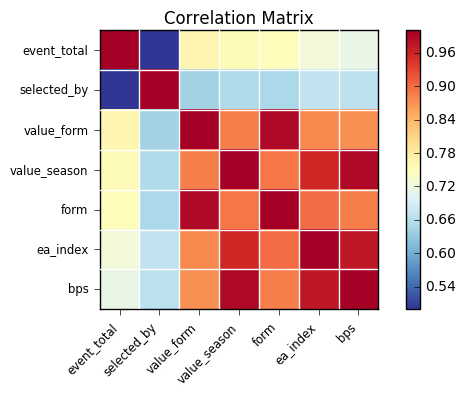

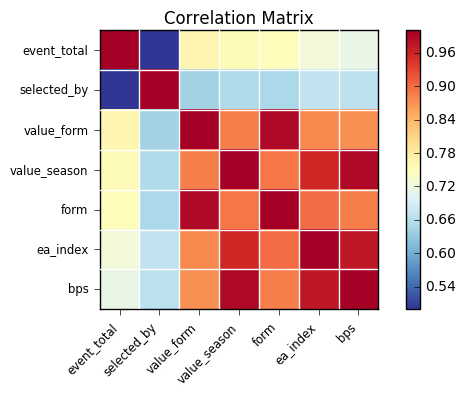

In [22]:
corr_matrix = np.corrcoef(GoalKeeper_df[columns].T)
sm.graphics.plot_corr(corr_matrix, xnames=columns)

In [23]:
# Its obvious from the Correlation Matrix that there is correlation between bps - ea_index & form - value_form
# Hence removing bps & value_from model and exploring
goalkeepers_model = smf.ols(formula='event_total ~ selected_by + form + value_season + ea_index', data=GoalKeeper_df).fit()
goalkeepers_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     17.69
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           7.43e-09
Time:                        19:48:29   Log-Likelihood:                -87.393
No. Observations:                  51   AIC:                             184.8
Df Residuals:                      46   BIC:                             194.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.0482      0.270     -0.179      0.859        -0.591     0.495
selected_by     -0.0123      0.055     -0.221      0.826        -0.124     0.099
form             0.5249      0.271      1.936      0.059        -0.021     1.071
value_season     0.3662      0.210      1.744      0.088        -0.056     0.789
ea_index        -0.0083      0.015     -0.546      0.587        -0.039     0.022
==============================================================================
Omnibus:                       10.280   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.681
Skew:                           0.825   Prob(JB):                      0.00479
Kurtosis:                       4.519   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Removing players who have played 0 minutes till now
GoalKeeper_df[GoalKeeper_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalKeepers.csv')
regular_goalKeeper_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalKeepers.csv',index_col='web_name', na_filter=False)


In [25]:
# Running all features models for data set without fringe players
# This inculdes all the possible features, just to study the importance of each feature
all_features_model = smf.ols(formula='event_total ~ selected_by + total_points+ chance_of_playing_this_round + value_form + value_season + form + transfers_out_event+ transfers_in_event + points_per_game + minutes +ea_index + bps', data=regular_goalKeeper_df).fit()
all_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2.400
Date:                Mon, 21 Aug 2017   Prob (F-statistic):             0.0565
Time:                        19:49:36   Log-Likelihood:                -48.574
No. Observations:                  29   AIC:                             127.1
Df Residuals:                      14   BIC:                             147.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1480      1.410      0.105      0.918        -2.877     3.173
chance_of_playing_this_round[T.0]      -0.3968      1.804     -0.220      0.829        -4.267     3.473
chance_of_playing_this_round[T.100]    -1.0501      0.871     -1.206      0.248        -2.917     0.817
chance_of_playing_this_round[T.25]     -0.7353      1.565     -0.470      0.646        -4.093     2.622
selected_by                             0.0916      0.104      0.880      0.394        -0.132     0.315
total_points                            0.2603      0.355      0.733      0.476        -0.501     1.022
value_form                              7.9869     12.671      0.630      0.539       -19.190    35.164
value_season                            0.2794      1.752      0.159      0.876        -3.479     4.037
form                                   -1.8818      2.782     -0.676      0.510        -7.850     4.086
transfers_out_event                    -0.0005      0.000     -1.950      0.071        -0.001  4.55e-05
transfers_in_event                  -1.662e-05      0.000     -0.090      0.930        -0.000     0.000
points_per_game                        -0.0910      0.394     -0.231      0.821        -0.936     0.754
minutes                                 0.0049      0.007      0.753      0.464        -0.009     0.019
ea_index                                0.0045      0.037      0.122      0.905        -0.075     0.084
bps                                    -0.0686      0.054     -1.263      0.227        -0.185     0.048
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.778
Skew:                           0.317   Prob(JB):                        0.678
Kurtosis:                       2.508   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Creating two interaction terms based on what we learned from multi-collinearity matrix
regular_goalKeeper_df['interaction_term1'] = regular_goalKeeper_df.value_form * regular_goalKeeper_df.form
regular_goalKeeper_df['interaction_term2'] = regular_goalKeeper_df.value_season * regular_goalKeeper_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X = regular_goalKeeper_df[cols]

y = regular_goalKeeper_df.event_total

lm = LinearRegression()


In [27]:
scores = cross_val_score(lm, X, y, cv=5, scoring='mean_squared_error')

In [28]:
#Calculating Root Mean Squared Error
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Nov Model 2.17058

2.1705838946868767

In [29]:
goalkeepers_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec1_players.csv',index_col='web_name', na_filter=False)

goalkeepers_dec1_df[goalkeepers_dec1_df.type_name=='Goalkeeper'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/GoalkeeperPlayers_dec1.csv')

goalkeepers_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/GoalkeeperPlayers_dec1.csv',index_col='web_name', na_filter=False)

goalkeepers_dec1_df[goalkeepers_dec1_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalkeepers_dec1.csv')
regular_goalkeepers_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalkeepers_dec1.csv',index_col='web_name', na_filter=False)


regular_goalkeepers_dec1_df['interaction_term1'] = regular_goalkeepers_dec1_df.value_form * regular_goalkeepers_dec1_df.form
regular_goalkeepers_dec1_df['interaction_term2'] = regular_goalkeepers_dec1_df.value_season * regular_goalkeepers_dec1_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X2 = regular_goalkeepers_dec1_df[cols]

y2 = regular_goalkeepers_dec1_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X2, y2, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores))


2.0422718633856483

In [30]:
goalkeepers_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec4_players.csv',index_col='web_name', na_filter=False)

goalkeepers_dec4_df[goalkeepers_dec4_df.type_name=='Goalkeeper'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/GoalkeeperPlayers_dec4.csv')

goalkeepers_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/GoalkeeperPlayers_dec4.csv',index_col='web_name', na_filter=False)

goalkeepers_dec4_df[goalkeepers_dec4_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalkeepers_dec4.csv')
regular_goalkeepers_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalkeepers_dec4.csv',index_col='web_name', na_filter=False)


regular_goalkeepers_dec4_df['interaction_term1'] = regular_goalkeepers_dec4_df.value_form * regular_goalkeepers_dec4_df.form
regular_goalkeepers_dec4_df['interaction_term2'] = regular_goalkeepers_dec4_df.value_season * regular_goalkeepers_dec4_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X3 = regular_goalkeepers_dec4_df[cols]

y3 = regular_goalkeepers_dec4_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X3, y3, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores))


2.67784435634288

In [31]:
goalkeepers_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec9_players.csv',index_col='web_name', na_filter=False)

goalkeepers_dec9_df[goalkeepers_dec9_df.type_name=='Goalkeeper'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/GoalkeeperPlayers_dec9.csv')

goalkeepers_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/GoalkeeperPlayers_dec9.csv',index_col='web_name', na_filter=False)

goalkeepers_dec9_df[goalkeepers_dec9_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalkeepers_dec9.csv')
regular_goalkeepers_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_goalkeepers_dec9.csv',index_col='web_name', na_filter=False)


regular_goalkeepers_dec9_df['interaction_term1'] = regular_goalkeepers_dec9_df.value_form * regular_goalkeepers_dec9_df.form
regular_goalkeepers_dec9_df['interaction_term2'] = regular_goalkeepers_dec9_df.value_season * regular_goalkeepers_dec9_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X4 = regular_goalkeepers_dec9_df[cols]

y4 = regular_goalkeepers_dec9_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X4, y4, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores))


2.7249870107449459

In [34]:
# Training the model on the November Data Set & Testing for Dec 1, Dec4 & Dec 9 Data 

cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']
X = regular_goalKeeper_df[cols]
y = regular_goalKeeper_df.event_total
lm = LinearRegression()
#rf = RandomForestClassifier(n_estimators=100)
#rf.fit(X,y)
lm.fit(X, y) # fitting the linear regression on Nov values of X & Y

# Testing and Predicting for Dec 1 Data set
preds = lm.predict(X2) #X for Dec 1
# calc RMSE to compare preds vs y for Dec 1
rms = np.sqrt(mean_squared_error(y2, preds))
rms # RMSE for preds for Dec1 data set 2.7991


# Testing and Predicting for Dec 4 Data set
preds = lm.predict(X3) #X for Dec 4
# calc RMSE to compare preds vs y for Dec 4
rms = np.sqrt(mean_squared_error(y3, preds))
rms # RMSE for preds for Dec4 data set 2.1821

# Testing and Predicting for Dec 9 Data set
preds = lm.predict(X4) #X for Dec 9
# calc RMSE to compare preds vs y for Dec 9
rms = np.sqrt(mean_squared_error(y4, preds))
rms # RMSE for preds for Dec9 data set 2.9641

2.7991694891943983